## Disclaimer
This data analysis is not meant for any reference purpose and its result may not be accurate. Any insights from this reference are not recommended to use for any educational or research purpose or any other. 

### Data Source: Censusindia.gov.in
📌Color Indication: 
  * Blue: Total 
  * Green: Rural Area
  * Red: Urban Area


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
#Data on Disability: Distribution of Disabled Workers by Sex, 
#Economic Status and Residence (India & States/UTs)
df = pd.read_excel('http://censusindia.gov.in/2011census/Disability_Data/DISAB04-0000.xlsx') 
df.head(10)

,"Distribution of disabled workers by sex, economic status and residence - 2011",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Table Name,State Code,State Name,Type of disability,Total/ Rural/ Urban,Sex,Workers,NaN,NaN,NaN,NaN,Non-workers
1,NaN,NaN,NaN,NaN,NaN,NaN,Total,CL,AL,HHI,Others,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DISAB04,00,INDIA,Total disabled population,Total,Persons,9744386,2274322,2977272,435053,4057739,17070608
5,DISAB04,00,INDIA,Total disabled population,Total,Males,7072825,1716078,1914330,258144,3184273,7915768
6,DISAB04,00,INDIA,Total disabled population,Total,Females,2671561,558244,1062942,176909,873466,9154840
7,DISAB04,00,INDIA,Total disabled population,Rural,Persons,7004120,2189316,2821431,284989,1708384,11632238
8,DISAB04,00,INDIA,Total disabled population,Rural,Males,4912012,1651397,1803405,160314,1296896,5498547
9,DISAB04,00,INDIA,Total disabled population,Rural,Females,2092108,537919,1018026,124675,411488,6133691


In [4]:
df.drop(['Distribution of disabled workers by sex, economic status and \
residence - 2011','Unnamed: 1','Unnamed: 7','Unnamed: 8','Unnamed: 9',
  'Unnamed: 10'],axis=1,inplace=True)
df.head()

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 11
0,State Name,Type of disability,Total/ Rural/ Urban,Sex,Workers,Non-workers
1,NaN,NaN,NaN,NaN,Total,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,INDIA,Total disabled population,Total,Persons,9744386,17070608


In [5]:
df.drop([1,2,3],axis=0,inplace=True)
df.reset_index(inplace=True)
del df['index']
df.head(7)

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 11
0,State Name,Type of disability,Total/ Rural/ Urban,Sex,Workers,Non-workers
1,INDIA,Total disabled population,Total,Persons,9744386,17070608
2,INDIA,Total disabled population,Total,Males,7072825,7915768
3,INDIA,Total disabled population,Total,Females,2671561,9154840
4,INDIA,Total disabled population,Rural,Persons,7004120,11632238
5,INDIA,Total disabled population,Rural,Males,4912012,5498547
6,INDIA,Total disabled population,Rural,Females,2092108,6133691


In [6]:
df.loc[0][0] = 'Location'
df.columns = list(df.loc[0])
df.drop([0],axis=0,inplace=True)
df.reset_index(inplace=True)
del df['index']
df.head()

,Location,Type of disability,Total/ Rural/ Urban,Sex,Workers,Non-workers
0,INDIA,Total disabled population,Total,Persons,9744386,17070608
1,INDIA,Total disabled population,Total,Males,7072825,7915768
2,INDIA,Total disabled population,Total,Females,2671561,9154840
3,INDIA,Total disabled population,Rural,Persons,7004120,11632238
4,INDIA,Total disabled population,Rural,Males,4912012,5498547


In [7]:
df['Location'].unique()

array(['INDIA', 'State - JAMMU & KASHMIR (01)',
       'State - HIMACHAL PRADESH (02)', 'State - PUNJAB (03)',
       'State - CHANDIGARH (04)', 'State - UTTARAKHAND (05)',
       'State - HARYANA (06)', 'State - NCT OF DELHI (07)',
       'State - RAJASTHAN (08)', 'State - UTTAR PRADESH (09)',
       'State - BIHAR (10)', 'State - SIKKIM (11)',
       'State - ARUNACHAL PRADESH (12)', 'State - NAGALAND (13)',
       'State - MANIPUR (14)', 'State - MIZORAM (15)',
       'State - TRIPURA (16)', 'State - MEGHALAYA (17)',
       'State - ASSAM (18)', 'State - WEST BENGAL (19)',
       'State - JHARKHAND (20)', 'State - ODISHA (21)',
       'State - CHHATTISGARH (22)', 'State - MADHYA PRADESH (23)',
       'State - GUJARAT (24)', 'State - DAMAN & DIU (25)',
       'State - DADRA & NAGAR HAVELI (26)', 'State - MAHARASHTRA (27)',
       'State - ANDHRA PRADESH (28)', 'State - KARNATAKA (29)',
       'State - GOA (30)', 'State - LAKSHADWEEP (31)',
       'State - KERALA (32)', 'State - TAMIL

In [8]:
df[['temp','Location']] = df.Location.str.split("-",expand=True)
df.Location = df['Location'].str.strip()
del df['temp']
df.head()

,Location,Type of disability,Total/ Rural/ Urban,Sex,Workers,Non-workers
0,None,Total disabled population,Total,Persons,9744386,17070608
1,None,Total disabled population,Total,Males,7072825,7915768
2,None,Total disabled population,Total,Females,2671561,9154840
3,None,Total disabled population,Rural,Persons,7004120,11632238
4,None,Total disabled population,Rural,Males,4912012,5498547


In [9]:
df.head(82)

,Location,Type of disability,Total/ Rural/ Urban,Sex,Workers,Non-workers
0,None,Total disabled population,Total,Persons,9744386,17070608
1,None,Total disabled population,Total,Males,7072825,7915768
2,None,Total disabled population,Total,Females,2671561,9154840
3,None,Total disabled population,Rural,Persons,7004120,11632238
4,None,Total disabled population,Rural,Males,4912012,5498547
5,None,Total disabled population,Rural,Females,2092108,6133691
6,None,Total disabled population,Urban,Persons,2740266,5438370
7,None,Total disabled population,Urban,Males,2160813,2417221
8,None,Total disabled population,Urban,Females,579453,3021149
9,None,In Seeing,Total,Persons,1891919,3141512


In [10]:
for i in range(81):
  df.loc[i][0] = "India"

In [11]:
df[['Location','temp']] = df.Location.str.split("(",expand=True)
df.Location = df['Location'].str.strip()
del df['temp']
df.head(82)

,Location,Type of disability,Total/ Rural/ Urban,Sex,Workers,Non-workers
0,India,Total disabled population,Total,Persons,9744386,17070608
1,India,Total disabled population,Total,Males,7072825,7915768
2,India,Total disabled population,Total,Females,2671561,9154840
3,India,Total disabled population,Rural,Persons,7004120,11632238
4,India,Total disabled population,Rural,Males,4912012,5498547
5,India,Total disabled population,Rural,Females,2092108,6133691
6,India,Total disabled population,Urban,Persons,2740266,5438370
7,India,Total disabled population,Urban,Males,2160813,2417221
8,India,Total disabled population,Urban,Females,579453,3021149
9,India,In Seeing,Total,Persons,1891919,3141512


In [12]:
df.Location.unique()

array(['India', 'JAMMU & KASHMIR', 'HIMACHAL PRADESH', 'PUNJAB',
       'CHANDIGARH', 'UTTARAKHAND', 'HARYANA', 'NCT OF DELHI',
       'RAJASTHAN', 'UTTAR PRADESH', 'BIHAR', 'SIKKIM',
       'ARUNACHAL PRADESH', 'NAGALAND', 'MANIPUR', 'MIZORAM', 'TRIPURA',
       'MEGHALAYA', 'ASSAM', 'WEST BENGAL', 'JHARKHAND', 'ODISHA',
       'CHHATTISGARH', 'MADHYA PRADESH', 'GUJARAT', 'DAMAN & DIU',
       'DADRA & NAGAR HAVELI', 'MAHARASHTRA', 'ANDHRA PRADESH',
       'KARNATAKA', 'GOA', 'LAKSHADWEEP', 'KERALA', 'TAMIL NADU',
       'PUDUCHERRY', 'ANDAMAN & NICOBAR ISLANDS'], dtype=object)

In [13]:
df['Location'] = df['Location'].replace('NCT OF DELHI','DELHI')

In [14]:
df.Location.unique()

array(['India', 'JAMMU & KASHMIR', 'HIMACHAL PRADESH', 'PUNJAB',
       'CHANDIGARH', 'UTTARAKHAND', 'HARYANA', 'DELHI', 'RAJASTHAN',
       'UTTAR PRADESH', 'BIHAR', 'SIKKIM', 'ARUNACHAL PRADESH',
       'NAGALAND', 'MANIPUR', 'MIZORAM', 'TRIPURA', 'MEGHALAYA', 'ASSAM',
       'WEST BENGAL', 'JHARKHAND', 'ODISHA', 'CHHATTISGARH',
       'MADHYA PRADESH', 'GUJARAT', 'DAMAN & DIU', 'DADRA & NAGAR HAVELI',
       'MAHARASHTRA', 'ANDHRA PRADESH', 'KARNATAKA', 'GOA', 'LAKSHADWEEP',
       'KERALA', 'TAMIL NADU', 'PUDUCHERRY', 'ANDAMAN & NICOBAR ISLANDS'],
      dtype=object)

In [15]:
df['Latitude'] = None
df['Longitude'] = None
df.head(2)

,Location,Type of disability,Total/ Rural/ Urban,Sex,Workers,Non-workers,Latitude,Longitude
0,India,Total disabled population,Total,Persons,9744386,17070608,None,None
1,India,Total disabled population,Total,Males,7072825,7915768,None,None


In [16]:
temp = 0
lis = list(df.Location.unique())
from geopy.geocoders import Nominatim
for i in range(len(df.Location.unique())):
  address = lis[i]
  geolocator = Nominatim(user_agent="ny_explorer")
  location = geolocator.geocode(address)

  #To save the processing time
  for j in range(81):
    df.loc[temp][6] = location.latitude
    df.loc[temp][7] = location.longitude
    temp+=1

In [17]:
df.dtypes

Location               object
Type of disability     object
Total/ Rural/ Urban    object
Sex                    object
Workers                object
Non-workers            object
Latitude               object
Longitude              object
dtype: object

In [18]:
df['Workers'] = df['Workers'].astype('int')
df['Non-workers'] = df['Non-workers'].astype('int')
df.dtypes

Location               object
Type of disability     object
Total/ Rural/ Urban    object
Sex                    object
Workers                 int64
Non-workers             int64
Latitude               object
Longitude              object
dtype: object

In [19]:
temp_total = df[df['Total/ Rural/ Urban'] == 'Total'][df['Sex'] == 'Persons'][df['Location']!='India']
temp_rural = df[df['Total/ Rural/ Urban'] == 'Rural'][df['Sex'] == 'Persons'][df["Location"]!="India"]
temp_urban = df[df['Total/ Rural/ Urban'] == 'Urban'][df['Sex'] == 'Persons'][df['Location']!='India']

In [20]:
temp_total.head()

,Location,Type of disability,Total/ Rural/ Urban,Sex,Workers,Non-workers,Latitude,Longitude
81,JAMMU & KASHMIR,Total disabled population,Total,Persons,121532,239621,33.5574,75.0615
90,JAMMU & KASHMIR,In Seeing,Total,Persons,22281,44167,33.5574,75.0615
99,JAMMU & KASHMIR,In Hearing,Total,Persons,29855,44241,33.5574,75.0615
108,JAMMU & KASHMIR,In Speech,Total,Persons,6548,12133,33.5574,75.0615
117,JAMMU & KASHMIR,In Movement,Total,Persons,19323,38814,33.5574,75.0615


In [21]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [ ]:
#Displaying static image https://plotly.com/python/orca-management/
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

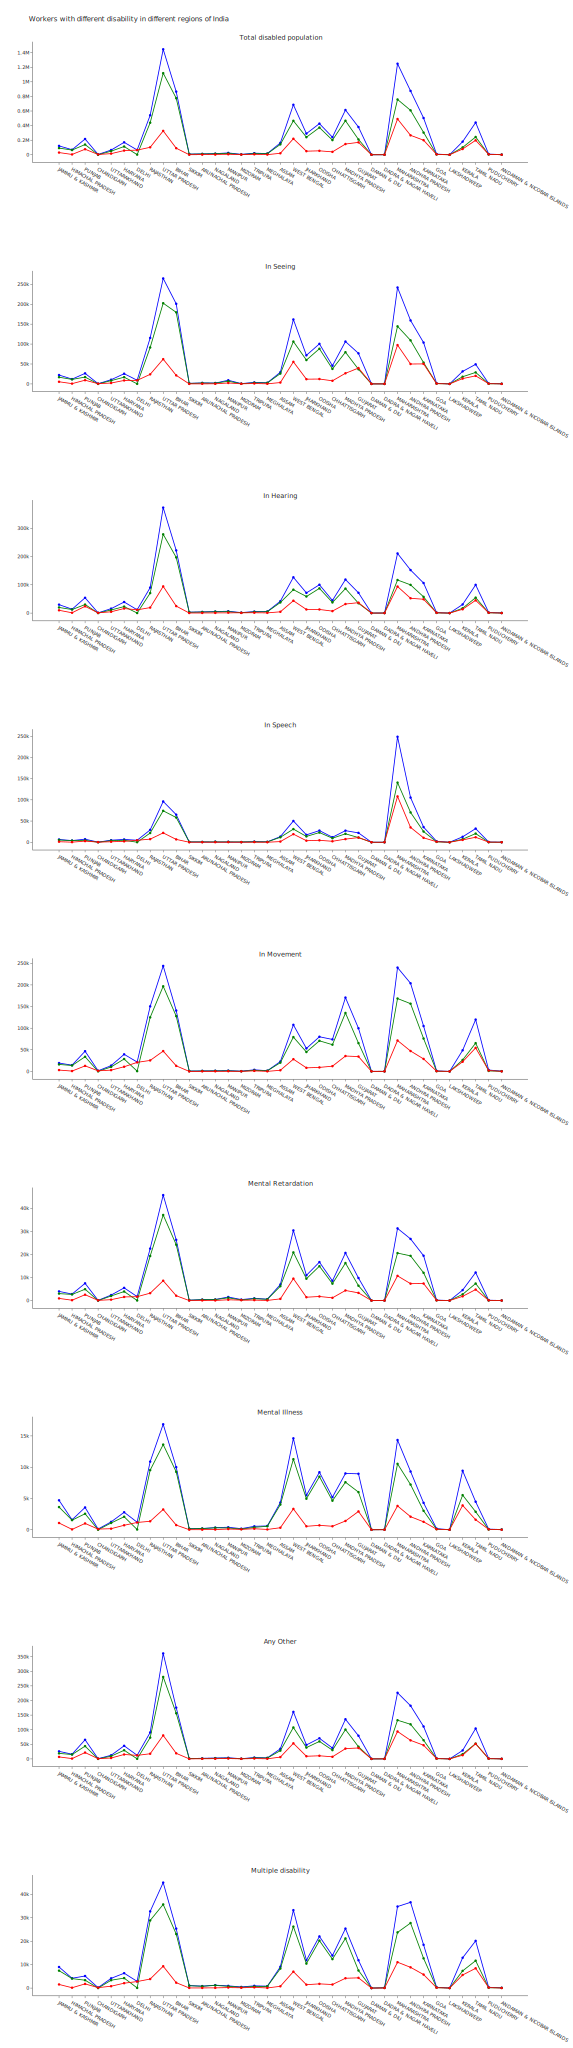

In [26]:
tup = tuple(df['Type of disability'].unique())
fig = make_subplots(rows=len(tup), cols=1,#shared_xaxes=True,
                    subplot_titles=tup)
for i in range(len(tup)):
  fig.add_trace(go.Scatter(x=temp_total[temp_total['Type of disability']==tup[i]]['Location'], 
                           y=temp_total[temp_total['Type of disability']==tup[i]]['Workers'],mode='lines+markers',
                          name='Total',marker_color='blue'), row=i+1, col=1)
  fig.add_trace(go.Scatter(x=temp_rural[temp_rural['Type of disability']==tup[i]]['Location'], 
                           y=temp_rural[temp_rural['Type of disability']==tup[i]]['Workers'],mode='lines+markers',
                          name='Rural',marker_color='green'), row=i+1, col=1)
  fig.add_trace(go.Scatter(x=temp_urban[temp_urban['Type of disability']==tup[i]]['Location'], 
                           y=temp_urban[temp_urban['Type of disability']==tup[i]]['Workers'],mode='lines+markers',
                          name='Urban',marker_color='red'), row=i+1, col=1)
fig.update_layout(template='simple_white',height = 3000,
                   title='Workers with different disability in different regions of India',
                  showlegend=False)
fig.show()
fig.show("svg", height = 5000, width = 1400) #for static image

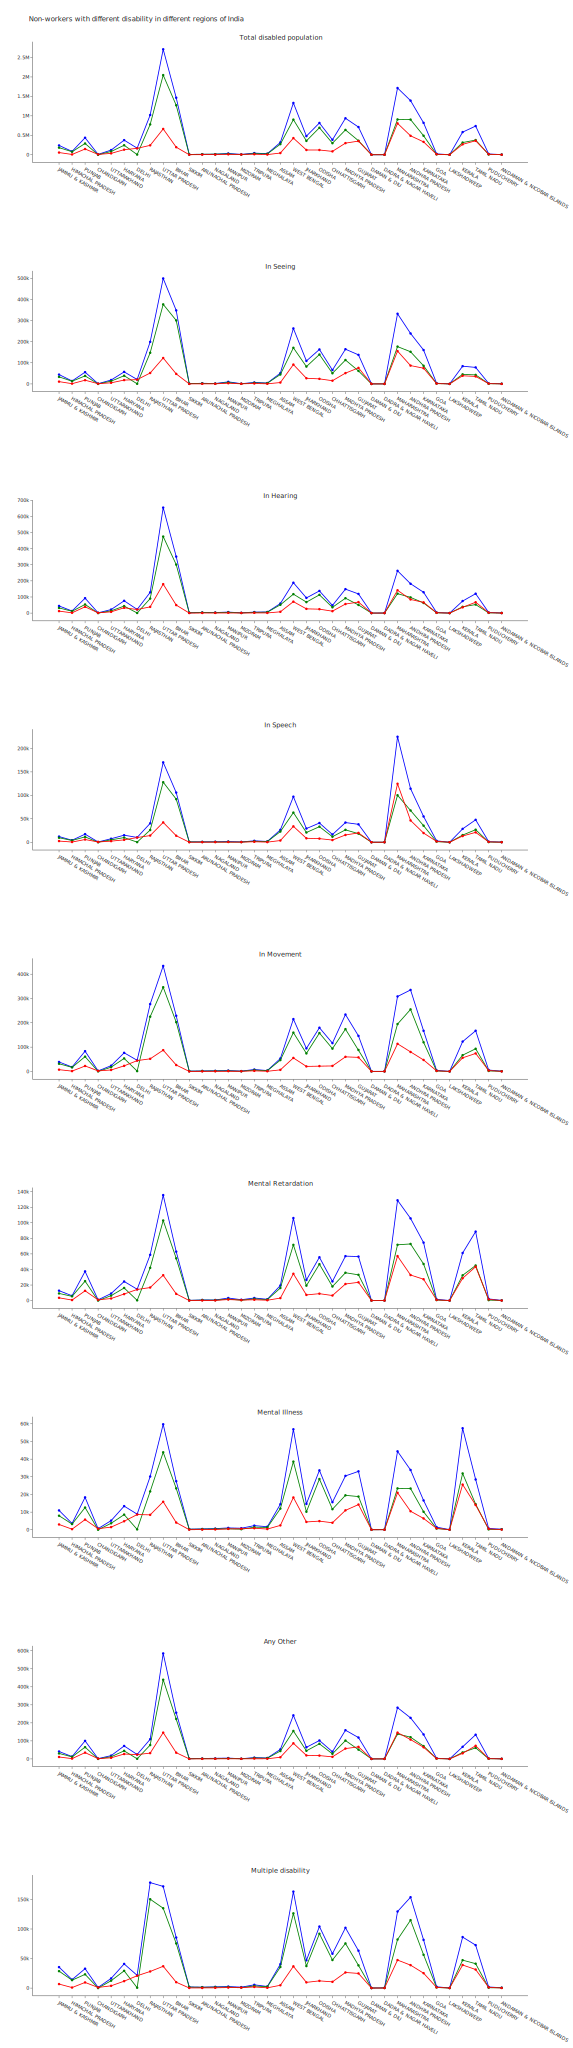

In [30]:
tup = tuple(df['Type of disability'].unique())
fig = make_subplots(rows=len(tup), cols=1,#shared_xaxes=True,
                    subplot_titles=tup)
for i in range(len(tup)):
  fig.add_trace(go.Scatter(x=temp_total[temp_total['Type of disability']==tup[i]]['Location'], 
                           y=temp_total[temp_total['Type of disability']==tup[i]]['Non-workers'],mode='lines+markers',
                          name='Total',marker_color='blue'), row=i+1, col=1)
  fig.add_trace(go.Scatter(x=temp_rural[temp_rural['Type of disability']==tup[i]]['Location'], 
                           y=temp_rural[temp_rural['Type of disability']==tup[i]]['Non-workers'],mode='lines+markers',
                          name='Rural',marker_color='green'), row=i+1, col=1)
  fig.add_trace(go.Scatter(x=temp_urban[temp_urban['Type of disability']==tup[i]]['Location'], 
                           y=temp_urban[temp_urban['Type of disability']==tup[i]]['Non-workers'],mode='lines+markers',
                          name='Urban',marker_color='red'), row=i+1, col=1)
fig.update_layout(template='simple_white',height = 3000,
                   title='Non-workers with different disability in different regions of India',
                  showlegend=False)
fig.show()
fig.show("svg", height = 5000, width = 1400) #for static image

In [27]:
temp = temp_total[temp_total['Type of disability'] == 'Total disabled population']

           Workers with different disability in different regions of India


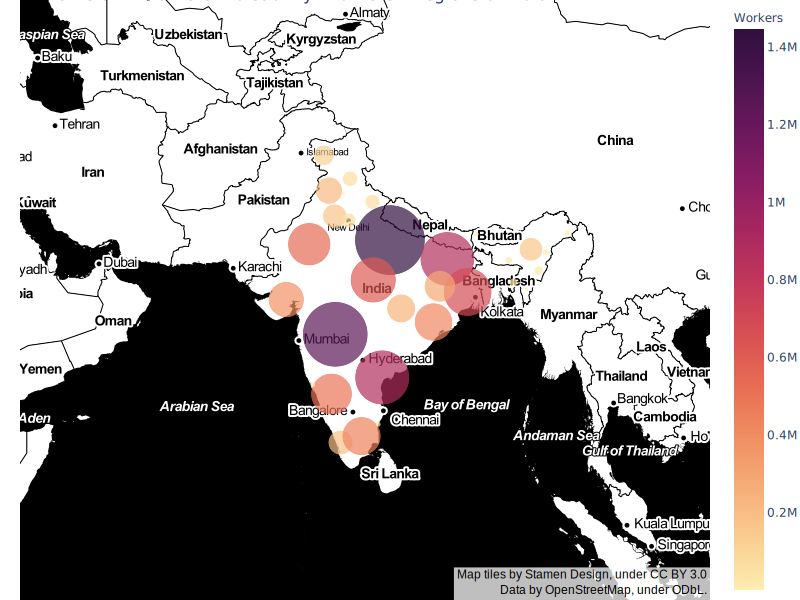

In [28]:
fig = px.scatter_mapbox(
        temp,
        title='map',
        lat="Latitude",
        lon="Longitude",
        color="Workers",
        size="Workers",
        size_max=50,
        hover_name="Location",
        hover_data=["Workers",'Location'],
        color_continuous_scale='matter',
    )

fig.layout.update(
        margin={"r": 0, "t": 0, "l": 20, "b": 0},
        height=600,
        width = 800,
        coloraxis_showscale=False,
        mapbox_style='stamen-toner',
        mapbox=dict(center=dict(lat=22.3511, lon=78.6677), zoom=3),
    )

fig.data[0].update(
        hovertemplate="Location: %{customdata[1]} <br>Disabled worker count: %{customdata[0]}"
    )
fig.update_layout(coloraxis_showscale=True,
            title='Workers with different disability in different regions of India')
print('           Workers with different disability in different regions of India')
fig.show()
fig.show('svg',height=600,width = 800,) #for static image


           Non-workers with different disability in different regions of India


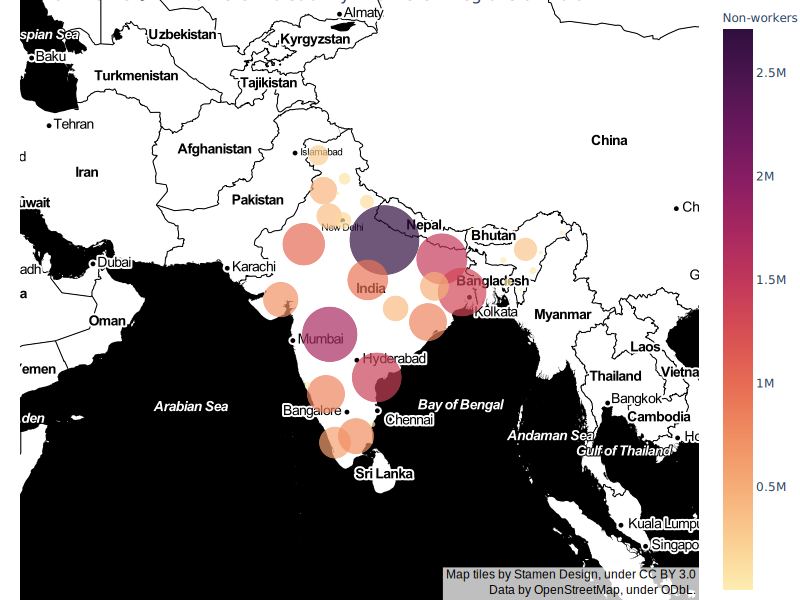

In [29]:
fig = px.scatter_mapbox(
        temp,
        title='map',
        lat="Latitude",
        lon="Longitude",
        color="Non-workers",
        size="Non-workers",
        size_max=50,
        hover_name="Location",
        hover_data=["Non-workers",'Location'],
        color_continuous_scale='matter',
    )

fig.layout.update(
        margin={"r": 0, "t": 0, "l": 20, "b": 0},
        height=600,
        width = 800,
        coloraxis_showscale=False,
        mapbox_style='stamen-toner',
        mapbox=dict(center=dict(lat=22.3511, lon=78.6677), zoom=3),
    )

fig.data[0].update(
        hovertemplate="Location: %{customdata[1]} <br>Disabled Non-workers count: %{customdata[0]}"
    )
fig.update_layout(coloraxis_showscale=True,
            title='Non-workers with different disability in different regions of India')
print('           Non-workers with different disability in different regions of India')
fig.show()
fig.show('svg',height=600,width = 800,) #for static image


## Conclusion
* Line graph shows that in most of regions of India, the number of disabled workers and disabled non-workers are more in rural areas than in urban areas(see the green line v/s red). 
* Some locations such as Uttar Pradesh and Maharashtra has more number of disabled population of different types as compared to other locations(State/UT).